In [9]:
# check version
import tensorflow
print(tensorflow.__version__)

2.10.0


In [ ]:
# fit the model
model.fit(X, y, epochs=100, batch_size=32)

'''
Fit the Model

Modeli takmak için önce dönem sayısı (eğitim veri kümesindeki döngüler) ve toplu iş boyutu
(model hatasını tahmin etmek için kullanılan bir dönemdeki örnek sayısı) gibi eğitim
yapılandırmasını seçmeniz gerekir.
Eğitim, seçilen kayıp fonksiyonunu en aza indirmek için seçilen optimizasyon algoritmasını
uygular ve hata algoritmasının geri yayılımını kullanarak modeli günceller.
Modeli takmak tüm sürecin yavaş kısmıdır ve modelin karmaşıklığına, kullandığınız donanıma
ve eğitim veri kümesinin boyutuna bağlı olarak saniyeler ila saatler ila günler sürebilir.
API perspektifinden bu, eğitim sürecini gerçekleştirmek için bir işlevin çağrılmasını içerir.
Bu fonksiyon, eğitim süreci bitene kadar bloke eder (geri dönmez).
'''


...
# evaluate the model
loss = model.evaluate(X, y, verbose=0)



...
# make a prediction
yhat = model.predict(X)

'''
Bir tahmin yapmak, yaşam döngüsünün son adımıdır. Bu yüzden modeli ilk etapta istedik.
Bir tahminin gerekli olduğu, örneğin hedef değerlere sahip olmadığınız yeni verilere
sahip olmanızı gerektirir.
API perspektifinden, bir sınıf etiketi, olasılık veya sayısal değerin tahminini yapmak
için bir işlevi çağırmanız yeterlidir - modelinizi tahmin etmek için tasarladığınız şey
ne olursa olsun.
Modeli kaydetmek ve daha sonra tahminlerde bulunmak için yüklemek isteyebilirsiniz.
Ayrıca, kullanmaya başlamadan önce mevcut tüm verilere bir model sığdırmayı da seçebilirsiniz.
Artık model yaşam döngüsüne aşina olduğunuza göre, modeller oluşturmak için tf.keras API'sini
kullanmanın iki ana yoluna bir göz atalım: sıralı ve işlevsel.
'''


# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(100, input_shape=(8,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

'''
Sequential Model API (Simple)
Sıralı bir sınıf tanımlamayı ve modele girdiden çıktıya kadar tek tek doğrusal bir şekilde
katmanlar eklemeyi içerdiği için “ sıralı ” olarak adlandırılır .

Aşağıdaki örnek, sekiz girişi kabul eden, 10 düğümlü bir gizli katmana ve ardından sayısal
bir değeri tahmin etmek için tek düğümlü bir çıkış katmanına sahip olan bir Sıralı MLP modelini
tanımlar

Ağın görünür katmanının, ilk gizli katmandaki " input_shape " argümanı tarafından tanımlandığını
unutmayın. Yukarıdaki örnekte, model bir örnek için girdinin sekiz sayıdan oluşan bir vektör
olmasını beklemektedir.
'''


In [11]:
# example of a model defined with the functional api
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
# define the layers
x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)
# define the model
model = Model(inputs=x_in, outputs=x_out)

'''
Functional Model API (Advanced)
'''

'\nFunctional Model API (Advanced)\n'

(235, 34) (116, 34) (235,) (116,)
Test Accuracy: 0.888
1/1 [==============================] - 0s 47ms/step
Predicted: 0.996


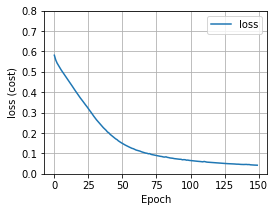

In [17]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

fig,ax = plt.subplots(1,1, figsize = (4,3))
ax.plot(history.history['loss'], label='loss')
ax.set_ylim([0, 0.8])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)

pyplot.show()

In [20]:
# example of summarizing a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                90        
                                                                 
 dense_36 (Dense)            (None, 8)                 88        
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


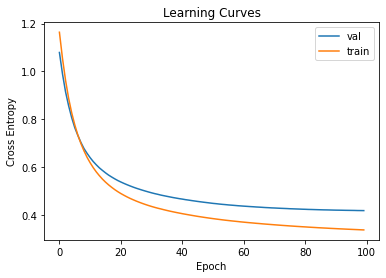

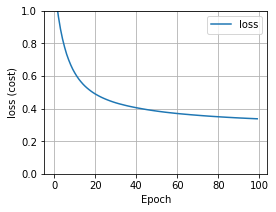

In [21]:
# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model

model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model

sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)


# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.plot(history.history['loss'], label='train')

pyplot.legend()

fig,ax = plt.subplots(1,1, figsize = (4,3))
ax.plot(history.history['loss'], label='loss')
ax.set_ylim([0, 1])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)


pyplot.show()